In [229]:
import os
import time

import duckdb
import pandas as pd
import plotly.express as px
import pyarrow.parquet as pq
from plotly_calplot import calplot

from common.env_variables import DUCKDB_DWH_FILE, CURATED_DIR, DATA_SOURCE_NAME
from common.storage import load_cleansed_df
from common.entity import SITEMAP, JOB_ONLINE

In [230]:
conn = duckdb.connect(DUCKDB_DWH_FILE)

In [231]:
entity = JOB_ONLINE

In [232]:

df = conn.execute(f'''
SELECT *
FROM src_{entity.name}
WHERE
    year = 2022 AND
    month = 9 AND
    day = 1
;
''').df()

In [233]:

df = conn.execute(f'''
SELECT *
FROM count_job_online_by_date
;
''').df()

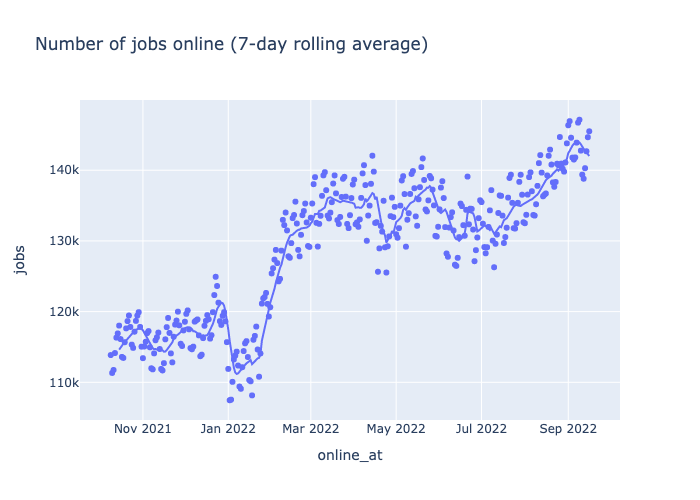

In [234]:
fig = px.scatter(df, x='online_at', y='jobs', trendline='rolling', trendline_options=dict(window=7),
                 title='Number of jobs online (7-day rolling average)')
fig.show('png')

In [235]:

df = conn.execute(f'''
SELECT *
FROM job_online_by_date_change
;
''').df()

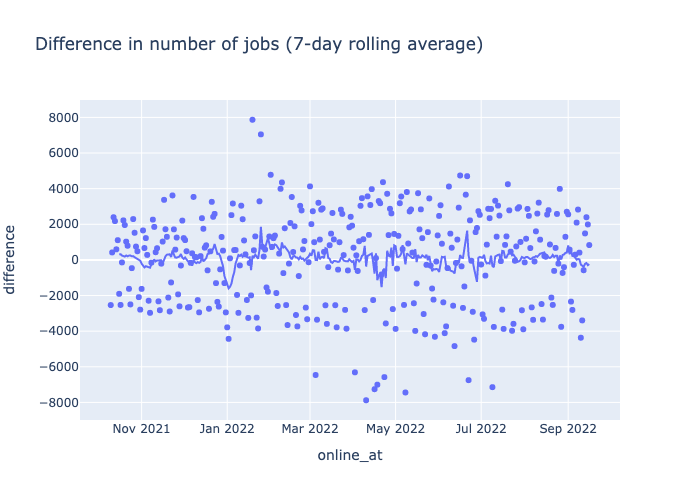

In [236]:
fig = px.scatter(df, x='online_at', y='difference', trendline='rolling', trendline_options=dict(window=7),
                 title='Difference in number of jobs (7-day rolling average)')
fig.show('png')

In [237]:
min_difference = df['difference'].min()
df['difference'] = df['difference'] - min_difference
print(df['difference'].min())

0


/Users/carrion/PycharmProjects/job-market-analytics/python/simplescraper/venv/lib/python3.10/site-packages/plotly_calplot/date_extractors.py:16: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/Users/carrion/PycharmProjects/job-market-analytics/python/simplescraper/venv/lib/python3.10/site-packages/plotly_calplot/date_extractors.py:16: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



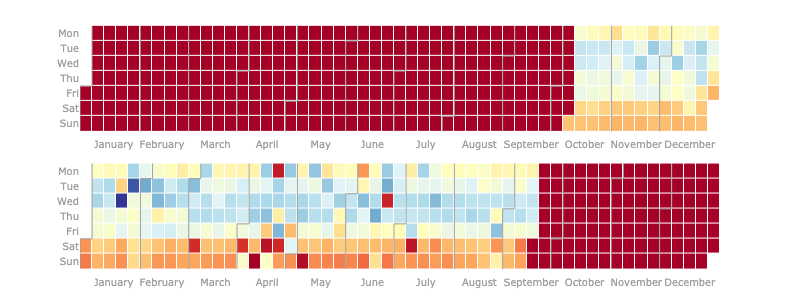

In [238]:
fig = calplot(
    df,
    x='online_at',
    y='difference',
    colorscale='RdYlBu'
)
fig.show('png')


In [239]:
conn.close()